<a href="https://colab.research.google.com/github/severancej/colorful_project/blob/main/AI_14_%EC%9E%A5%EC%A7%80%EC%9D%80_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# <항상 시작 전>라이브러리 불러오기

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [44]:
#한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [45]:
# matplotlib의 폰트를 Nanum 폰트로 지정합니다.
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

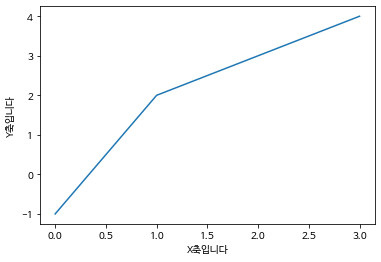

In [46]:
#그래프에서 한글이 잘 나오는지 확인합니다.
plt.plot([-1, 2, 3, 4])
plt.xlabel('X축입니다')
plt.ylabel('Y축입니다')
plt.show()

In [47]:
#파일 업로드
from google.colab import files
uploaded = files.upload() 

Saving vgames2.csv to vgames2 (3).csv


In [48]:
# .read_csv() 활용하여 데이터 불러오기
df = pd.read_csv('vgames2.csv')

#데이터 정제 전 원본copy함
df1 = df.copy()

In [49]:
#시각적 탐색을 위한 코드
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [50]:

#데이터셋의 shape 확인
print(df1.shape)
print("")
print("")

#데이터셋의 info 확인
print(df1.info( ))


(16598, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
None


In [51]:
#🕹️ Data Description
#Name : 게임의 이름입니다.
#Platform : 게임이 지원되는 플랫폼의 이름입니다.
#Year : 게임이 출시된 연도입니다.
#Genre : 게임의 장르입니다.
#Publisher : 게임을 제작한 회사입니다.
#NA_Sales : 북미지역에서의 출고량입니다.
#EU_Sales : 유럽지역에서의 출고량입니다.
#JP_Sales : 일본지역에서의 출고량입니다.
#Other_Sales : 기타지역에서의 출고량입니다.
df1.head( )

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.000,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.000,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.000,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.000,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.000,Platform,D3Publisher,0.12,0.09,0,0.04


In [52]:
# 데이터의 결측치 확인 - df1
pd.DataFrame(df1.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Unnamed: 0,0
Name,0
Platform,0
Year,271
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [53]:
# 필요없는 열 Unnamed: 0 제거
#제거하는 이유:인덱스가 아니어서 결측값 제거하면 값의 재정렬이 힘들다 
df1.drop(['Unnamed: 0'], axis = 1,inplace = True)
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.000,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.000,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.000,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.000,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.000,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.000,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.000,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.000,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.000,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [54]:
# 'Year' 결측데이터를 삭제한 이유는 연도를 추측하는것이 쉽지 않고
#다음분기 게임 설계를 위해 연도별 게임트렌드를 알아야 하는데
#삭제하지 않고 값을 0으로 두면 정확한 연도별 게임트렌드 분석수치가 달라질것 
#같아서 삭제하기로 결정했고,

#'Genre'의 결측데이터는 50개이지만 일일이 이름과 회사를 대조해서  
#일일이 장르를 찾는데 시간이 걸려서 삭제하기로 결정했다.

df1.dropna(subset=['Year', 'Genre'],axis=0, inplace=True)
#삭제 됐는지 확인 = 16598-271 = 16,327
df1.shape


(16277, 9)

In [55]:
#몇개의 데이터가 삭제 됐는지 확인 = 16598-16277 = 321
#전체 데이터 16598개 중 Year와 Genre의 합계 결측치 321개는 
#전체 데이터의 1.93%정도여서, 
#삭제한다해도 분석결과에 큰 영향을 주지 않을거라고 생각한다. 


In [56]:
# column_Year을 이해하기 쉽게 int로 변환
#전체 데이터 보니깐 년도만 표시해서 float형태로 있을 필요가 없음
df1 = df1.astype({'Year':'int'})

In [57]:
#연도별 개수 확인
#이유 이상치 확인 위해서
pd.DataFrame(df1.value_counts(subset = ['Year']), columns=["연도 개수"])

,연도 개수
Year,
2009,1418
2008,1413
2010,1248
2007,1193
2011,1126
...,...
13,2
12,2
94,1


In [58]:
# 전체표 확인 결과 Year가 네자리 형태가 아니고, 100이하인 이상데이터를 확인
less_100 = df1[df1.Year < 100]
#이유 이상value별로 개수 확인 위해서
pd.DataFrame(less_100.value_counts(subset = ['Year']),columns=["연도개수"])

,연도개수
Year,
11,10
8,10
9,10
3,7
6,7
10,7
15,5
16,5
4,4


In [59]:
#Year의 이상value를 네자리수로 맞추기
#20 이하는 +2000을 하고
#20 초과 100 미만은 +1900을 더한다

def correct_Year(Year):
  if (0<= Year) & (Year<=20):
    return Year + 2000
  elif (20<Year) & (Year<=100):
    return Year + 1900
  else:
    return Year

df1['Year'] = df1['Year'].apply(correct_Year)

pd.DataFrame(df1.value_counts(subset = ['Year']), columns=["연도 개수"])

,연도 개수
Year,
2009,1428
2008,1423
2010,1255
2007,1196
2011,1136
2006,1005
2005,939
2002,826
2003,774


In [60]:
#Year의 value값을 오름차순으로 정렬함
#연도별로 보기 위해서
df1.sort_values(by='Year',inplace= True )
#인덱스 재정렬
df1 = df1.reset_index(drop=True)
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Freeway,2600,1980,Action,Activision,0.32,0.02,0,0
1,Checkers,2600,1980,Misc,Atari,0.22,0.01,0,0K
2,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0,0.01
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0,0
4,Asteroids,2600,1980,Shooter,Atari,4,0.26,0,0.05
...,...,...,...,...,...,...,...,...,...
16272,Lego Star Wars: The Force Awakens,XOne,2016,Action,Warner Bros. Interactive Entertainment,0.12,0.1,0,0.02
16273,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
16274,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0
16275,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0


In [61]:
# 데이터의 남은 결측치 확인 - df1
pd.DataFrame(df1.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,0
Genre,0
Publisher,36
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [62]:
#'Publisher'(게임회사이름)은 없어도 연도별 출고량이나 게임장르를 알 수 있어서, 
#'Publisher'는 유의미한 데이터라고 판단해서 삭제안하고 0으로 채움
df1['Publisher'].fillna(0, inplace=True)
#'Publisher' 결측치를 0으로 채우고 난 후 결측치 없어졌나 다시 확인 - df1
pd.DataFrame(df1.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [21]:
# 데이터의 개수로  회사순위를 알기위해서 
# 게임회사 수 확인
pd.DataFrame(df1.value_counts(subset = ['Publisher']), columns=["게임 데이터 개수"])

,게임 데이터 개수
Publisher,
Electronic Arts,1332
Activision,963
Namco Bandai Games,924
Ubisoft,913
Konami Digital Entertainment,821
...,...
Imadio,1
Revolution (Japan),1
Illusion Softworks,1


In [63]:
#576개 회사 존재함을 확인
#게임출고량 단위가 다 달라서 회사별로 출고량의 단위를 알기위해
#출고량 단위는 숫자형이여야 해서
#눈으로 봤을때 출고량에 K나 M이 붙어있어서, 
#출고량에 붙은문자를 제거할것임

In [64]:
import re

def has_errors(inputString):
  return bool(re.search('[K,M]', inputString))

In [65]:
error_condition1 = df1.NA_Sales.apply(has_errors)
error_sales1 = df1[error_condition1]
error_sales1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
130,Ice Climber,NES,1985,Platform,Nintendo,0.46M,0.1,0.92,0.02
198,Adventures of Lolo,NES,1989,Puzzle,HAL Laboratory,60K,0,0,0
333,Dragon Quest I & II,SNES,1993,Role-Playing,Enix Corporation,0M,0,1.15,0
554,Virtua Fighter 2,SAT,1995,Fighting,Sega,340K,0.26,1.3,0.03
778,Fire Emblem: Seisen no Keifu,SNES,1996,Strategy,Nintendo,0K,0,0.58,0
...,...,...,...,...,...,...,...,...,...
16007,Total War: WARHAMMER,PC,2016,Strategy,Sega,0M,0.1,0,0.01
16031,Kamen Rider: Battride War Genesis,PSV,2016,Action,Namco Bandai Games,0M,0,0.05,0
16043,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.3M,2.07,0.18,0.65
16072,Destiny: The Collection,PS4,2016,Shooter,Activision,0.01M,0.04,0,0.01


In [66]:
# EU_Sales컬럼에 숫자가 아닌 K,M들이 붙어서 섞여 있는 오류 데이터를 확인
error_condition2 = df1.EU_Sales.apply(has_errors)
error_sales2 = df1[error_condition2]
error_sales2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
34,E.T.: The Extra Terrestrial,2600,1981,Action,Atari,1.84,110K,0,0.02
255,The Legend of the Mystical Ninja,SNES,1991,Adventure,Konami Digital Entertainment,0,0K,0.48,0
423,Majin Tensei,SNES,1994,Role-Playing,Atlus,0,0K,0.08,0
613,DefCon 5,PS,1995,Shooter,Psygnosis,0.04,0.03M,0,0
661,A-Train,PS,1995,Simulation,Sony Computer Entertainment,0.02,0.01M,0.04,0.01
...,...,...,...,...,...,...,...,...,...
15922,Otoko Yukaku,PSV,2015,Action,D3Publisher,0,0K,0.02,0
15972,Ace Attorney 6,3DS,2016,Adventure,Capcom,0,0M,0.27,0
16020,Koihime Enbu,PS4,2016,Fighting,Yeti,0,0M,0.02,0
16193,Odin Sphere: Leifthrasir,PS4,2016,Role-Playing,Nippon Ichi Software,0.06,30K,0.07,0.02


In [67]:
error_condition3 = df1.JP_Sales.apply(has_errors)
error_sales3 = df1[error_condition3]
error_sales3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
241,Chibi Maruko-Chan: Harikiri 365-Nichi no Maki,SNES,1991,Misc,Epoch,0,0,80K,0
252,SimEarth: The Living Planet,SNES,1991,Simulation,Imagineer,0,0,160K,0
367,Worldwide Soccer,SAT,1994,Sports,Sega,0,0,0.06M,0
476,Virtua Racing,GEN,1994,Racing,Sega,0,0,260K,0
480,Virtua Fighter,SAT,1994,Fighting,Sega,0.17,0.12,0.77M,0.02
...,...,...,...,...,...,...,...,...,...
16037,Agatha Christie's The ABC Murders,PS4,2016,Adventure,Microids,0.01,0.01,0M,0
16060,R.B.I. Baseball 2016,XOne,2016,Sports,MLB.com,0.04,0,0K,0
16111,Revolution: 25th Anniversary Collection,PC,2016,Adventure,Koch Media,0,0.02,0K,0
16177,Resident Evil 5 HD,PS4,2016,Action,Capcom,0.01,0,0M,0


In [68]:
error_condition4 = df1.Other_Sales.apply(has_errors)
error_sales4 = df1[error_condition4]
error_sales4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Checkers,2600,1980,Misc,Atari,0.22,0.01,0,0K
115,F1 Race,NES,1984,Racing,Nintendo,0,0,1.52,0K
154,Pro Yakyuu Family Stadium,NES,1986,Sports,Namco Bandai Games,0.15,0,2.05,0M
183,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.7,190K
217,Disney's Chip 'n Dale: Rescue Rangers,NES,1990,Platform,Capcom,0.68,0.14,0.35,0.02M
...,...,...,...,...,...,...,...,...,...
15879,Monster High: New Ghoul in School,X360,2015,Action,Little Orbit,0,0.04,0,0K
15912,Hakuoki Zuisouroku Omokage Hana,PSV,2015,Action,Idea Factory,0,0,0.03,0K
15930,Project Setsuna,PSV,2016,Role-Playing,Square Enix,0,0,0.05,0K
15939,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,Namco Bandai Games,0,0,0.01,0K


In [69]:
#sales컬럼들의 K나M이 붙은 value들을 조사결과 나온 행들의 수가
#192,195,196,197이여서 같은 회사의 게임 출고량 단위가 아닐 수도 있을것 같음.

In [70]:
# 출고량 데이터 숫자단위 통일시키고 숫자타입으로 타입 변경하기
# 구글링 결과 K와 M의 뜻
#K(킬로) = 1,000 (천)단위 
#M(메가) = 1,000,000 (백만)단위
#단위크기를 M으로 맞춤
def unit(x):
  if str(x).find("K") != -1 :
    return float(str(x).split("K")[0].replace('.',''))*1000
        # 위의 return코드의 뜻은 문자를 가져와서 
    #K를 기준으로 자른 다음 기준점의 [0](=앞부분)을 가졀와서  .을 없애고 1000을 곱함.
    #데이터 타입은 float형태로 반환한다
  elif str(x).find("M") != -1 :
    return float(str(x).split("M")[0].replace('.',''))*1000000
  else:
    return float(str(x).replace('.',''))*1000000

for col in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
  df1[col] = df1[col].apply(unit)
print(df1.dtypes)
df1.head()




Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Freeway,2600,1980,Action,Activision,32000000.000,2000000.000,0.000,0.000
1,Checkers,2600,1980,Misc,Atari,22000000.000,1000000.000,0.000,0.000
2,Boxing,2600,1980,Fighting,Activision,72000000.000,4000000.000,0.000,1000000.000
3,Bridge,2600,1980,Misc,Activision,25000000.000,2000000.000,0.000,0.000
4,Asteroids,2600,1980,Shooter,Atari,4000000.000,26000000.000,0.000,5000000.000


In [72]:
# 결측치 없애고 전체 데이터에서 중복된 데이터 확인
df1.duplicated().sum()

0

In [31]:
# 랜덤으로 추출하여 missing_value확인
df1.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7347,Pachitte Chonmage Tatsujin 12: Pachinko Ultraman,PS2,2007,Misc,Hackberry,0.0,0.0,3000000.0,0.0
13815,Zumba Fitness Rush,X360,2012,Sports,505 Games,0.0,16000000.0,0.0,2000000.0
2392,Yu-Gi-Oh! The Eternal Duelist Soul (JP sales),GBA,2001,Misc,Konami Digital Entertainment,0.0,0.0,4000000.0,1000000.0
1948,NBA Showtime: NBA on NBC,N64,1999,Sports,Midway Games,23000000.0,2000000.0,0.0,0.0
8599,Call of Duty: World at War Final Fronts,PS2,2008,Shooter,Activision,61000000.0,18000000.0,0.0,94000000.0
4356,Vexx,XB,2003,Platform,Acclaim Entertainment,8000000.0,2000000.0,0.0,0.0
16145,Call of Duty: Modern Warfare Trilogy,X360,2016,Shooter,Activision,1000000.0,1000000.0,0.0,0.0
11124,Monster 4x4: Stunt Racer,Wii,2009,Racing,Ubisoft,18000000.0,0.0,0.0,1000000.0
1916,Supercross 2000,N64,1999,Racing,Electronic Arts,23000000.0,6000000.0,0.0,0.0
11621,Final Fantasy XIII,X360,2010,Role-Playing,Square Enix,127000000.0,68000000.0,1000000.0,2000000.0


In [73]:
#모든 나라의 판매량을 합친 값을 가진 새로운 column을 생성
df1['Total sales'] = df1['NA_Sales']+df1['EU_Sales']+df1['JP_Sales']+df1['Other_Sales']
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total sales
0,Freeway,2600,1980,Action,Activision,32000000.000,2000000.000,0.000,0.000,34000000.000
1,Checkers,2600,1980,Misc,Atari,22000000.000,1000000.000,0.000,0.000,23000000.000
2,Boxing,2600,1980,Fighting,Activision,72000000.000,4000000.000,0.000,1000000.000,77000000.000
3,Bridge,2600,1980,Misc,Activision,25000000.000,2000000.000,0.000,0.000,27000000.000
4,Asteroids,2600,1980,Shooter,Atari,4000000.000,26000000.000,0.000,5000000.000,35000000.000
...,...,...,...,...,...,...,...,...,...,...
16272,Lego Star Wars: The Force Awakens,XOne,2016,Action,Warner Bros. Interactive Entertainment,12000000.000,1000000.000,0.000,2000000.000,15000000.000
16273,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.000,0.000,1000000.000,0.000,1000000.000
16274,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.000,0.000,1000000.000,0.000,1000000.000
16275,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.000,0.000,3000000.000,0.000,3000000.000


In [74]:
#시간의 따른 플랫폼의 이용량 변화를 위해 
#"Name', 'Platform',	'Year',	'GenreTotal', 'Total sales' 컬럼을 뽑아서
#새로운 데이터를 만듦
df2 = df1[['Name','Platform','Year','Genre','Total sales']]
df2

,Name,Platform,Year,Genre,Total sales
0,Freeway,2600,1980,Action,34000000.000
1,Checkers,2600,1980,Misc,23000000.000
2,Boxing,2600,1980,Fighting,77000000.000
3,Bridge,2600,1980,Misc,27000000.000
4,Asteroids,2600,1980,Shooter,35000000.000
...,...,...,...,...,...
16272,Lego Star Wars: The Force Awakens,XOne,2016,Action,15000000.000
16273,Brothers Conflict: Precious Baby,PSV,2017,Action,1000000.000
16274,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,1000000.000
16275,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,3000000.000


In [105]:
#Genre의 value 종류 보기위해서
df5 = pd.DataFrame(df1.value_counts(subset = ['Genre']), columns=["장르 개수"])
df5

,장르 개수
Genre,
Action,3242
Sports,2299
Misc,1705
Role-Playing,1466
Shooter,1280
Adventure,1270
Racing,1220
Platform,874
Simulation,849


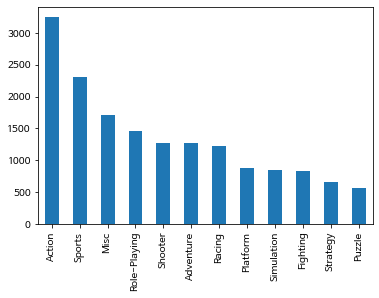

In [117]:
df2['Genre'].value_counts().plot.bar();

In [90]:
#그냥 구하니깐 Total sales값이 e가 나와서 소수점아래 3번째까지 표한하도록 함
pd.options.display.float_format = '{:.3f}'.format

In [96]:
#1980-2020년 까지 전기간 장르별 총 출고량순위
df2_1 = df2.groupby('Genre', as_index=False)['Total sales'].sum().sort_values(by='Total sales',ascending=False).round(0)
df2_1

,Genre,Total sales
0,Action,154529330000.000
10,Sports,120537430000.000
8,Shooter,93762370000.000
7,Role-Playing,82170800000.000
4,Platform,74542150000.000
3,Misc,71164260000.000
6,Racing,66910720000.000
2,Fighting,40297520000.000
9,Simulation,34660290000.000
1,Adventure,21792550000.000


In [120]:
df2_1 = pd.read_csv('./df2_1.csv')
df2_1.drop(['Unnamed: 0'], axis = 1,inplace = True)
df2_1

,Genre,Total sales
0,Action,154529330000.000
1,Sports,120537430000.000
2,Shooter,93762370000.000
3,Role-Playing,82170800000.000
4,Platform,74542150000.000
5,Misc,71164260000.000
6,Racing,66910720000.000
7,Fighting,40297520000.000
8,Simulation,34660290000.000
9,Adventure,21792550000.000


In [145]:
#Total sales을  'Year', 'Genre'으로 묶어서 분석
df3 = pd.DataFrame(df2.groupby(['Year', 'Genre'])['Total sales'].mean())
df3.sort_values(by='Total sales', ascending=False)
df3

Total sales
Year Genre                     
1980 Action        34000000.000
     Fighting      77000000.000
     Misc          67500000.000
     Shooter      155500000.000
1981 Action        56204400.000
...                         ...
2016 Sports        38263157.895
     Strategy       3400000.000
2017 Action         1000000.000
     Role-Playing   2000000.000
2020 Simulation    29000000.000

[388 rows x 1 columns]

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df2,x='', hue='Year')

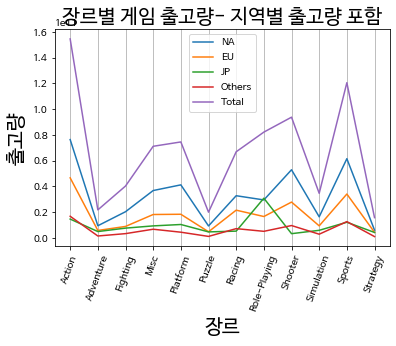

In [169]:
# 지역별 게임 출고량 분포 확인
group = df1.groupby("Genre").sum()
plt.plot(group['NA_Sales'],label="NA")
plt.plot(group['EU_Sales'],label="EU")
plt.plot(group['JP_Sales'],label="JP")
plt.plot(group['Other_Sales'],label="Others")
plt.plot(group['Total sales'],label="Total")
plt.xlabel('장르',fontsize=20)
plt.ylabel('출고량',fontsize=20)
plt.xticks(rotation=70)
plt.grid(axis='x')
plt.title("장르별 게임 출고량- 지역별 출고량 포함",fontsize=20)
plt.legend()
plt.show()

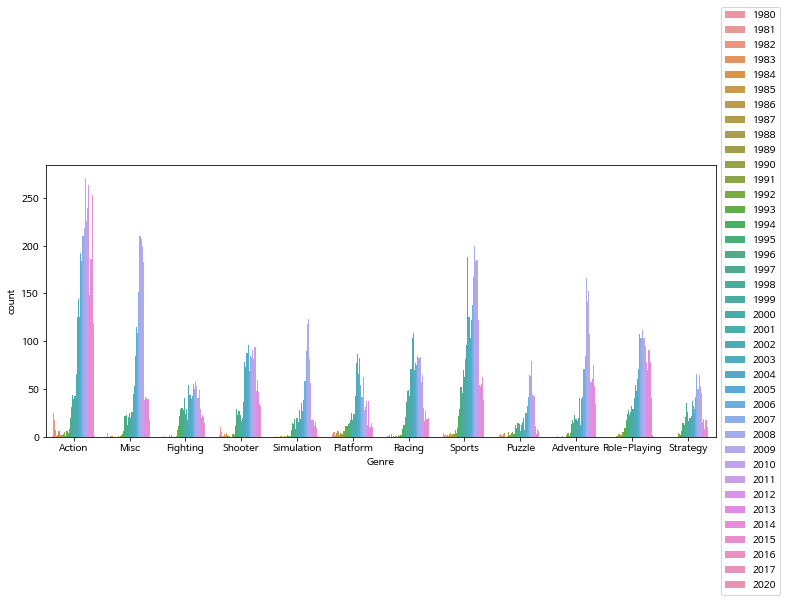

In [164]:
plt.figure(figsize=(12,5))
sns.countplot(data=df2, x='Genre', hue='Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [79]:
#시간이 흐르는 순으로 Platform의 이용량 순위 분석
#df4로 연도에 따라 Platform 이용량변화를 알수있음	
df4 = pd.DataFrame(df2.groupby(['Year', 'Platform'])['Total sales'].mean())
df4.sort_values(by='Total sales', ascending=False)
df4

Total sales
Year Platform              
1980 2600      86500000.000
1981 2600      73611086.957
1982 2600      73972222.222
1983 2600      53090909.091
     NES      170666666.667
...                     ...
2016 X360      10375000.000
     XOne      20259259.259
2017 PS4        3000000.000
     PSV        1000000.000
2020 DS        29000000.000

[241 rows x 1 columns]

In [118]:
#파일로 저장
# File export
df1.to_csv("./df1.csv", index=True)
df2.to_csv("./df2.csv", index=True)
df3.to_csv("./df3.csv", index=True)
df4.to_csv("./df4.csv", index=True)  
df2_1.to_csv("./df2_1.csv", index=True)  
df5.to_csv("./df5.csv", index=True)  

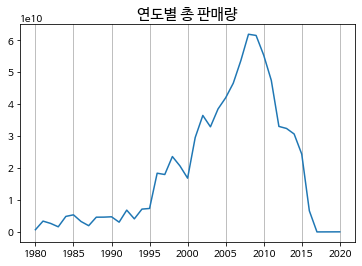

In [170]:
# 연도별 총 출고량 시각화
plt.plot(df2.groupby('Year')['Total sales'].sum())
plt.title(str("연도별 총 판매량"),fontsize=15)
plt.grid(axis='x')
plt.show()

In [176]:
group = df1.groupby('Genre')
f_exp_G = [group['Total sales'].sum()[x]/(group['Total sales'].sum()).sum() for x in range(0,len(group))] # 전체 출고량중 장르별 출고량 비율
f_exp_NA = [group['NA_Sales'].sum()[x]/(group['NA_Sales'].sum()).sum() for x in range(0,len(group))] # 북미(NA)출고량중 장르별 출고량 비율
f_exp_EU = [group['EU_Sales'].sum()[x]/(group['EU_Sales'].sum()).sum() for x in range(0,len(group))] # 유럽(EU)출고량중 장르별 출고량 비율
f_exp_Other = [group['Other_Sales'].sum()[x]/(group['Other_Sales'].sum()).sum() for x in range(0,len(group))] # 기타지역(Other)출고량중 장르별 출고량 비율
f_exp_JP = [group['EU_Sales'].sum()[x]/(group['EU_Sales'].sum()).sum() for x in range(0,len(group))] # 일본(JP)출고량중 장르별 출고량 비율

In [195]:
#미국 지역 게임 장르별 총출고량
df1_1 = df1.groupby('Genre', as_index=False)['NA_Sales'].sum().sort_values(by='NA_Sales',ascending=False)
df1_1

,Genre,NA_Sales
0,Action,76380030000.000
10,Sports,61533000000.000
8,Shooter,52946650000.000
4,Platform,41222310000.000
3,Misc,36812760000.000
6,Racing,32793490000.000
7,Role-Playing,29515210000.000
2,Fighting,20361810000.000
9,Simulation,16409870000.000
1,Adventure,9472270000.000


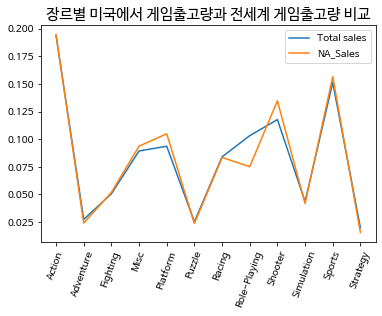

In [191]:
plt.plot(f_exp_G,label='Total sales')
plt.plot(f_exp_NA,label='NA_Sales')
plt.title(str("장르별 미국에서 게임출고량과 전세계 게임출고량 비교"),fontsize=15)
plt.legend()
x = range(0,12)
labels = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
plt.xticks(x,labels,rotation = 70)
plt.show( )

In [196]:
#유럽 지역 게임 장르별 총출고량
df1_2 = df1.groupby('Genre', as_index=False)['EU_Sales'].sum().sort_values(by='EU_Sales',ascending=False)
df1_2

,Genre,EU_Sales
0,Action,46653220000.000
10,Sports,34099730000.000
8,Shooter,27848340000.000
6,Racing,21577630000.000
4,Platform,18398290000.000
3,Misc,18207140000.000
7,Role-Playing,16642030000.000
9,Simulation,9399100000.000
2,Fighting,8943390000.000
1,Adventure,5826140000.000


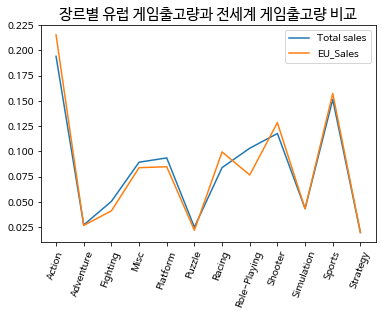

In [192]:
plt.plot(f_exp_G,label='Total sales')
plt.plot(f_exp_EU,label='EU_Sales')
plt.title(str("장르별 유럽 게임출고량과 전세계 게임출고량 비교"),fontsize=15)
plt.legend()
x = range(0,12)
labels = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
plt.xticks(x,labels,rotation = 70)
plt.show( )

In [197]:
#일본 지역 게임 장르별 총출고량
df1_3 = df1.groupby('Genre', as_index=False)['JP_Sales'].sum().sort_values(by='JP_Sales',ascending=False)
df1_3

,Genre,JP_Sales
7,Role-Playing,30862830000.000
0,Action,14654170000.000
10,Sports,12211230000.000
4,Platform,10449210000.000
3,Misc,9369230000.000
2,Fighting,7634180000.000
9,Simulation,5933250000.000
6,Racing,5300260000.000
1,Adventure,4967060000.000
5,Puzzle,4706000000.000


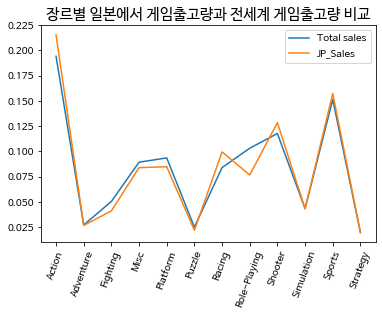

In [190]:
plt.plot(f_exp_G,label='Total sales')
plt.plot(f_exp_JP,label='JP_Sales')
plt.title(str("장르별 일본에서 게임출고량과 전세계 게임출고량 비교"),fontsize=15)
plt.legend()
x = range(0,12)
labels = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
plt.xticks(x,labels,rotation = 70)
plt.show( )

In [198]:
#기타지역 게임 장르별 총출고량
df1_4 = df1.groupby('Genre', as_index=False)['Other_Sales'].sum().sort_values(by='Other_Sales',ascending=False)
df1_4

,Genre,Other_Sales
0,Action,16841910000.000
10,Sports,12693470000.000
8,Shooter,9639340000.000
6,Racing,7239340000.000
3,Misc,6775130000.000
7,Role-Playing,5150730000.000
4,Platform,4472340000.000
2,Fighting,3358140000.000
9,Simulation,2918070000.000
1,Adventure,1527080000.000


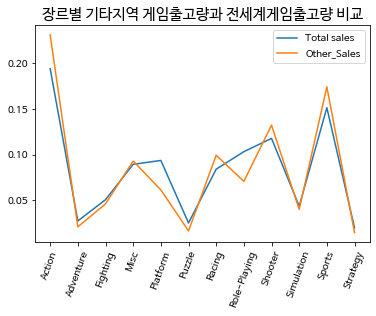

In [193]:
plt.plot(f_exp_G,label='Total sales')
plt.plot(f_exp_Other,label='Other_Sales')
plt.title(str("장르별 기타지역 게임출고량과 전세계게임출고량 비교"),fontsize=15)

plt.legend()
x = range(0,12)
labels = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
plt.xticks(x,labels,rotation = 70)
plt.show( )